CIA1:
1)Task1: Data collection from any social media website and explore all the approaches available in Stemming and Lemmatization. Give your comments


In [16]:
import instaloader
import pandas as pd

# Create an instance of Instaloader
# L.login('satchibaghla', '')

# Function to download captions
def download_instagram_captions(profile_name):
    # Load the profile
    profile = instaloader.Profile.from_username(L.context, profile_name)
    
    # Extract captions of the posts
    captions = []
    for post in profile.get_posts():
        if post.caption:
            captions.append(post.caption)
    
    # Save captions to a CSV file
    df = pd.DataFrame(captions, columns=["caption"])
    df.to_csv("instagram_captions.csv", index=False)

profile_name = "flyingbeast"
download_instagram_captions(profile_name)

In [9]:
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


df = pd.read_csv('instagram_captions.csv')

# Preprocessing function to clean the text
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text)  # remove digits
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = text.lower().strip()  # convert to lowercase and strip
    return text

df['cleaned_text'] = df['caption'].apply(preprocess_text)

# Stemming and Lemmatization
porter = PorterStemmer()
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# Applying stemming and lemmatization
df['porter_stemmed'] = df['cleaned_text'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))
df['snowball_stemmed'] = df['cleaned_text'].apply(lambda x: ' '.join([snowball.stem(word) for word in x.split()]))
df['lancaster_stemmed'] = df['cleaned_text'].apply(lambda x: ' '.join([lancaster.stem(word) for word in x.split()]))
df['lemmatized'] = df['cleaned_text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))

# Display the processed data
df[['cleaned_text', 'porter_stemmed', 'snowball_stemmed', 'lancaster_stemmed', 'lemmatized']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,cleaned_text,porter_stemmed,snowball_stemmed,lancaster_stemmed,lemmatized
0,coffee forever🫶,coffe forever🫶,coffe forever🫶,coff forever🫶,coffee forever🫶
1,memory haul💫,memori haul💫,memori haul💫,mem haul💫,memory haul💫
2,....me again😌,....me again😌,....me again😌,....me again😌,....me again😌
3,you are being missed alreadyy🥺🫶,you are be miss alreadyy🥺🫶,you are be miss alreadyy🥺🫶,you ar being miss alreadyy🥺🫶,you are being missed alreadyy🥺🫶
4,mother n daughter slayingg🫶,mother n daughter slayingg🫶,mother n daughter slayingg🫶,moth n daught slayingg🫶,mother n daughter slayingg🫶


2)Task2: Identify any 2 image file types (like tiff/jpeg/jpg and explore noise identification and removal methods). Give your descriptions and comparisons.

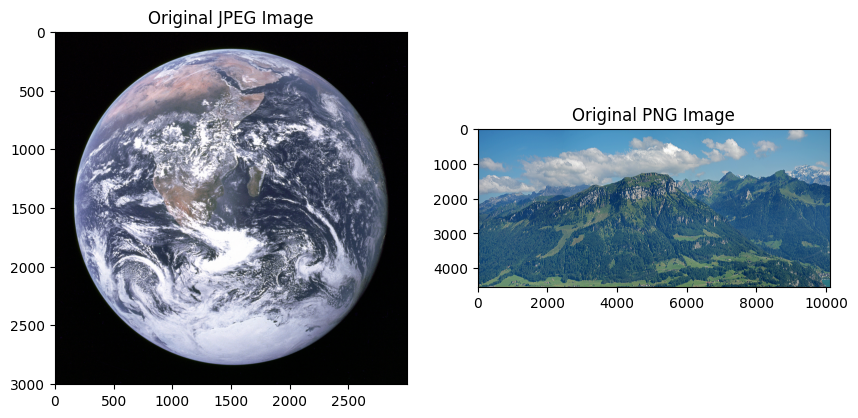

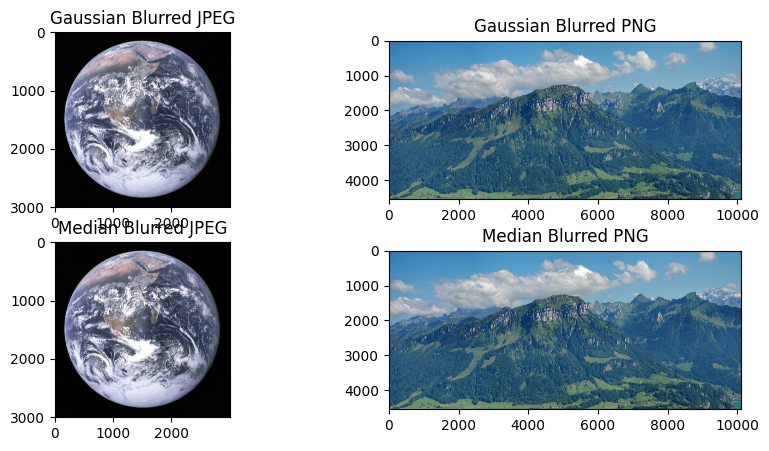

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

# URLs of the images
jpeg_url = "https://upload.wikimedia.org/wikipedia/commons/9/97/The_Earth_seen_from_Apollo_17.jpg"
png_url = "https://upload.wikimedia.org/wikipedia/commons/3/3f/Fronalpstock_big.jpg"

# Function to load an image from a URL
def load_image_from_url(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

# Load images
img_jpeg = load_image_from_url(jpeg_url)
img_png = load_image_from_url(png_url)

# Convert BGR to RGB for displaying correctly with matplotlib
img_jpeg_rgb = cv2.cvtColor(img_jpeg, cv2.COLOR_BGR2RGB)
img_png_rgb = cv2.cvtColor(img_png, cv2.COLOR_BGR2RGB)

# Display original images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original JPEG Image')
plt.imshow(img_jpeg_rgb)
plt.subplot(1, 2, 2)
plt.title('Original PNG Image')
plt.imshow(img_png_rgb)
plt.show()

# Applying Gaussian Blur
gaussian_blur_jpeg = cv2.GaussianBlur(img_jpeg, (5, 5), 0)
gaussian_blur_png = cv2.GaussianBlur(img_png, (5, 5), 0)

# Applying Median Blur
median_blur_jpeg = cv2.medianBlur(img_jpeg, 5)
median_blur_png = cv2.medianBlur(img_png, 5)

# Display blurred images
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('Gaussian Blurred JPEG')
plt.imshow(cv2.cvtColor(gaussian_blur_jpeg, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.title('Gaussian Blurred PNG')
plt.imshow(cv2.cvtColor(gaussian_blur_png, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 3)
plt.title('Median Blurred JPEG')
plt.imshow(cv2.cvtColor(median_blur_jpeg, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 4)
plt.title('Median Blurred PNG')
plt.imshow(cv2.cvtColor(median_blur_png, cv2.COLOR_BGR2RGB))
plt.show()
